**Comparación de los modelos para la galaxia G0 - Momento 300**

In [ ]:
#En primer lugar, importamos las librerias que vamos a necesitar a lo largo del ejercicio.
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
from astropy import units as unit
import sys

In [ ]:
#Aca importamos los datos a utilizar para una de las galaxias, en este caso la propia.
datadir = '/media/juan/Pesquisa/Simulations_Chris_2021'

In [ ]:
#Aca importamos los otros datos de la otra galaxia, en este caso apoyandonos con la herramienta pynbody.
data = pynbody.load(datadir+'/G0/snapshot_300.hdf5')

In [ ]:
#En esta celda vamos a definir las funciones con las cuales se van a calcular los radios para el alcance de las
#posiciones de las particulas de gas en primer lugar y de las estrellas: Para esto se saca la raiz cuadrada
#de sus posiciones en X y en Y elevadas al cuadrado.
def RGas(data):
    Rg = np.sqrt(data.gas['pos'][:,0]**2 + data.gas['pos'][:,1]**2)
    return Rg

def RStar(data):
    Rs = np.sqrt(data.star['pos'][:,0]**2 + data.star['pos'][:,1]**2)
    return Rs
#Aca nuevamente calculamos el radio pero en este caso de la materia oscura, en donde ademas consideraremos
#la coordenada en el eje Z: Por ende determinaremos la raiz cuadrada de la suma de las componentes en X, Y y Z al cuadrado.
def RDm(data):
    Rdm = np.sqrt(data.dm['pos'][:,0]**2 + data.dm['pos'][:,1]**2 + data.dm['pos'][:,2]**2)
    return Rdm

In [ ]:
#Ya contando con la informacion, revisaremos los datos obtenidos con la galaxia que vamos a comparar;
#comprobando los datos de materia oscura (dm) en posicion: Tiene 3 columnas por las posiciones X, Y y Z.
data.dm['pos'].shape

(30000, 3)

In [ ]:
#Repetimos el mismo proceso pero en este caso para los datos de las estrellas, en el momento considerado.
data.star['pos'].shape

(2469, 3)

In [ ]:
#Del mismo modo, tambien es posible observar los valores de los datos de posiciones para el gas,
#Pero en este caso estamos observando cada una de las posiciones
#NOTA: La configuracion asumida para las unidades NO es correcto (Mpc); dado que se esta asumiendo la misma
#configuracion de la galaxia modelada inicialmente.
data.gas['pos']

SimArray([[ 5.2149028e-01,  3.6431393e-01,  3.1890549e-02],
          [ 4.8034614e-01,  4.0029919e-01,  6.0718026e-02],
          [ 4.6313250e-01,  4.5663929e-01,  6.8787217e-02],
          ...,
          [ 1.5477165e+00, -4.2120951e-01, -2.4294017e-02],
          [ 1.6450659e+00, -4.4521946e-01, -2.2705153e-03],
          [ 8.5714560e+00, -1.6295255e+00,  3.9686736e-01]], dtype=float32, 'Mpc a h**-1')

In [ ]:
#Por otro lado, tambien es posible hacer sumatorias de la masa total, en este caso de la materia oscura
data.dm['mass'].sum()

SimArray(4.849374, dtype=float32, '1.00e+10 Msol h**-1')

(-20.0, 20.0)

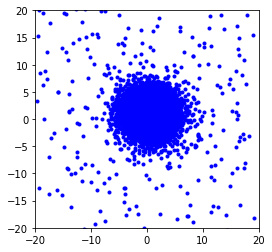

In [ ]:
#En la siguiente imagen, se han sintetizado los datos de las posiciones de las particulas de gas
#En la simulacion, en donde se arreglo la forma para que quedara de manera cuadrada la grafica:
plt.figure(figsize=(4,4))
#Se plotearon en el eje x las posiciones en el eje X (0) y en el eje Y las posiciones en el eje (Y)
#'.b' : Puntos azules 
plt.plot(data.gas['pos'][:,0],data.gas['pos'][:,1],'.b')
#Los limites han sido modificados para que dentro del plot queden unicamente los datos relevantes
#Se han excluido los datos que se desviaban de la tendencia general
plt.xlim(-20,20)
plt.ylim(-20,20)
#Dado que el centro de la galaxia parece coincidir con el centro del eje coordenado no se hizo necesaria una modificacion adicional.

(-20.0, 20.0)

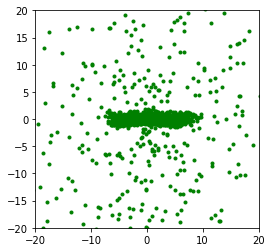

In [ ]:
#Nuevamente realizamos una grafica con los datos de posiciones del gas pero en este caso
#Con los valores de X en en el eje X y Z en el eje Y; obteniendo una vista desde una perspectiva
#diferente a la anterior, obteniendo una especie de elipse
#De nuevo, se modifico la forma del grafico para dar una apariencia cuadrada.
plt.figure(figsize=(4,4))
#Se seleccionaron los datos de los ejes; y se establecen puntos verdes.
plt.plot(data.gas['pos'][:,0],data.gas['pos'][:,2],'.g')
#Los limites definidos bajo el mismo criterio anterior.
plt.xlim(-20,20)
plt.ylim(-20,20)

In [ ]:
#Con las funciones que se definieron en un principio, tenemos el valor del radio de las posiciones de las 
#particulas de gas.
radio_gas = RGas(data)

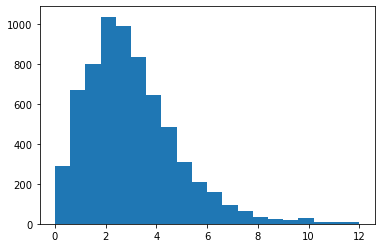

In [ ]:
#Realizamos el histograma con la informacion del radio del gas, limitando aun más el rango de los valores
#esto porque nuevamente, existen dados demasiado desviados de la mayoria de la informacion que poco interesan
#bins hace referencia al numero de barras (?)
kk = plt.hist(radio_gas,range =(0,12),bins=20)

In [ ]:
#Aca podemos observar los valores que se ubican en el eje Y obtenidos para el histograma anterior.
type(kk)
#Esta linea len() expresa el numero de items en una lista
len(kk)
kk[0]

array([ 289.,  672.,  801., 1038.,  989.,  836.,  648.,  484.,  310.,
        211.,  159.,   96.,   64.,   36.,   22.,   18.,   28.,    9.,
          8.,   10.])

In [ ]:
#Aca obtenemos los datos del histograma pero en el eje X, en donde se dan las divisiones de las barras del histograma.
kk[1]

array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
        6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. ],
      dtype=float32)

In [ ]:
#En esta celda se calcula la densidad de la superficie radial del disco
# Radial surface density of the disk
#Definimos la funcion de densidad en donde:
def density(pos,mass,n,limits):
    r       = np.sqrt((pos[:,:2]**2).sum(axis=1)) # Radio en donde consideramos unicamente las posiciones en X y Y
    histo   = np.histogram(r,n,range=limits) #Histograma en base a los datos de radio y el numero de casillas
    #o rectangulos que tenemos en el histograma, con el rango en el limite que definimos anteriormente para no 
    #tomar datos que no nos interesan
    bins     = (histo[1][:-1]+histo[1][1:])/2 #calculo de un punto promedio en medio de los rectangulos del histograma
    #para el cual, sumamos los valores limites del rectangulo y los dividimos en dos
    bn_mass = np.zeros(n) 
    #Aca hallamos el valor de la masa contenido en cada uno de los rectangulos del histograma, haciendo una sumatoria
    #de la masa que se obtiene en cada uno de los rectagulos considerados, en donde las condiciones se cumplan 
    #consideramos radios que se encuentren entre el valor minimo y maximo, que definiran los limites de los histogramas
    #se multiplican como condicional (Verdadero (1) o Falso (0))
    for i in range(n):
            bn_mass[i]      = mass[(r >= histo[1][i])*(histo[1][i+1] > r)].sum()
    #Calculamos la funcion de densidad superficial dividiendo la masa por el area de la circunferencia considerada 
    #con el radio promedio
    dens    = bn_mass/(np.pi)/((histo[1][1:])**2-(histo[1][:-1])**2)
    return histo,bins,dens

In [ ]:
#Definimos los valores que vamos a tomar en la funcion que acabamos de generar, para esto
#proporcionamos datos de posicion, de masa, # de rectangulos y los limites a considerar (basados en los datos relevantes)
histo,bins,dens = density(data.gas['pos'],data.gas['mass'],20,limits=(0,12))

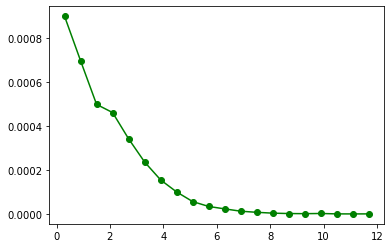

In [ ]:
#Realizamos un plot en donde correlacionamos los datos de bins y de dens y se observa una relacion
#Exponencial entre los mismos (X=bins; Y=dens)
plt.plot(bins,dens,"og-")

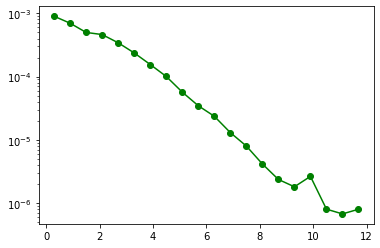

In [ ]:
#Como es preferible estudiar los datos a modo de logaritmo, los datos se han transformado a un grafico
#logaritmico.
plt.semilogy(bins,dens,"og-")